<a href="https://colab.research.google.com/github/RodrigoOBC/Notebooks_RedesNeurais/blob/main/Classifica%C3%A7%C3%A3o_de_diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
tf.__version__

'2.5.0'

In [8]:
diabetes_df = pd.read_csv('/content/diabetes.csv')

In [9]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = diabetes_df.iloc[:, 0:8].values

In [11]:
Y = diabetes_df.iloc[:, 8].values

In [12]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
#normaliza

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [18]:
X_train.shape

(537, 8)

In [19]:
X_test.shape

(231, 8)

In [44]:
# 8 -> 400 -> 400 -> 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=200, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               3600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)              

In [46]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy',tf.keras.metrics.Recall(name='recall')])

In [47]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 250)

Epoch 1/250
17/17 [==============================] - 1s 8ms/step - loss: 0.5927 - accuracy: 0.6760 - recall: 0.3191
Epoch 2/250
17/17 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.7765 - recall: 0.6064
Epoch 3/250
17/17 [==============================] - 0s 9ms/step - loss: 0.4710 - accuracy: 0.7765 - recall: 0.5957
Epoch 4/250
17/17 [==============================] - 0s 8ms/step - loss: 0.4539 - accuracy: 0.7784 - recall: 0.6489
Epoch 5/250
17/17 [==============================] - 0s 8ms/step - loss: 0.4551 - accuracy: 0.7858 - recall: 0.6330
Epoch 6/250
17/17 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.7803 - recall: 0.6170
Epoch 7/250
17/17 [==============================] - 0s 9ms/step - loss: 0.4324 - accuracy: 0.7896 - recall: 0.6277
Epoch 8/250
17/17 [==============================] - 0s 8ms/step - loss: 0.4543 - accuracy: 0.7970 - recall: 0.6436
Epoch 9/250
17/17 [==============================] - 0s 8ms/step - loss:

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
y_pred = (y_pred > 0.5)

In [50]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall'])

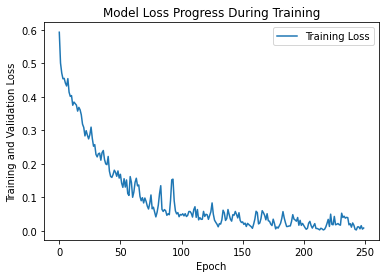

In [51]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

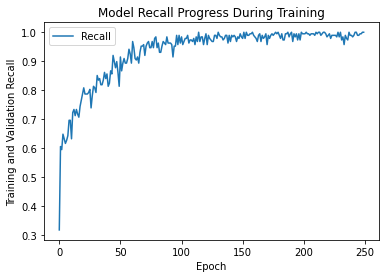

In [52]:
plt.plot(epochs_hist.history['recall'])
plt.title('Model Recall Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Recall')
plt.legend(['Recall']);

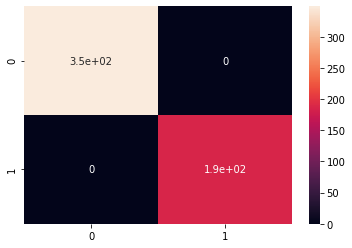

In [53]:
#Matrix de confusão treino 

from sklearn.metrics import confusion_matrix
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       349
        True       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



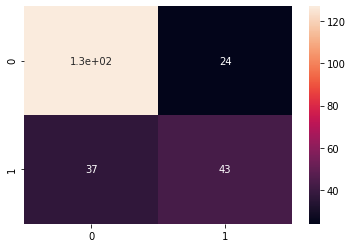

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       151
           1       0.64      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

